# KRW rates against USD and CAD


In [79]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Show available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [81]:
plt.style.use('seaborn-v0_8')

In [82]:
df = yf.download('USDKRW=X, CADKRW=X')
df = df.Close
df

[*********************100%%**********************]  2 of 2 completed


Ticker,CADKRW=X,USDKRW=X
Date,,
2003-12-01,918.719971,1198.400024
2003-12-02,921.409973,1195.000000
2003-12-03,917.010010,1192.500000
2003-12-04,907.510010,1190.099976
2003-12-05,908.460022,1184.699951
...,...,...
2024-03-26,985.752502,1339.130005
2024-03-27,988.878357,1343.060059
2024-03-28,993.482544,1349.800049


In [83]:
plt.rc('figure', figsize=(17, 8))
plt.rc('font', size=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=16)


<Axes: xlabel='Date'>

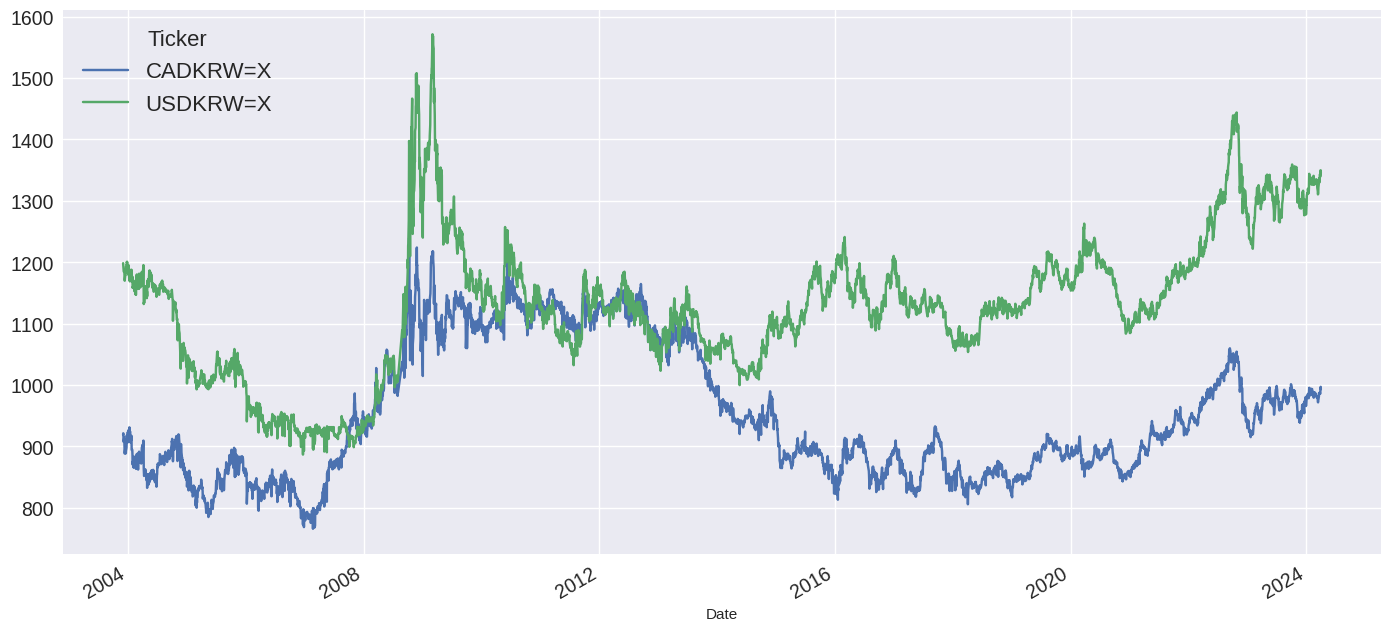

In [84]:
df.plot()

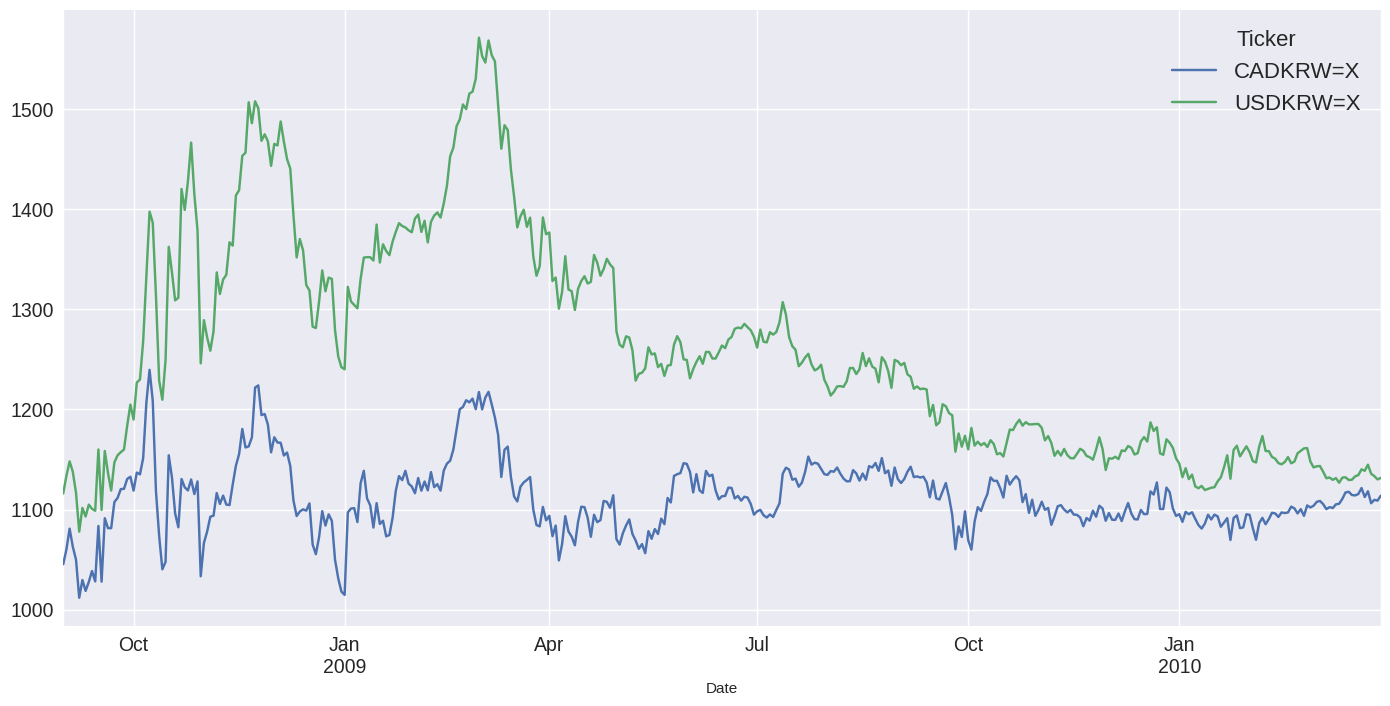

In [85]:
import matplotlib.dates as mdates 

ax = df.loc['2008-09':'2010-03'].plot()
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.show()


In [86]:
df.head()

Ticker,CADKRW=X,USDKRW=X
Date,,
2003-12-01,918.719971,1198.400024
2003-12-02,921.409973,1195.000000
2003-12-03,917.010010,1192.500000
2003-12-04,907.510010,1190.099976
2003-12-05,908.460022,1184.699951


## USD | CAD - KRW. 2004 - 
On global crisis, USD spikes at the faster rate than CAD.

<Axes: xlabel='Date'>

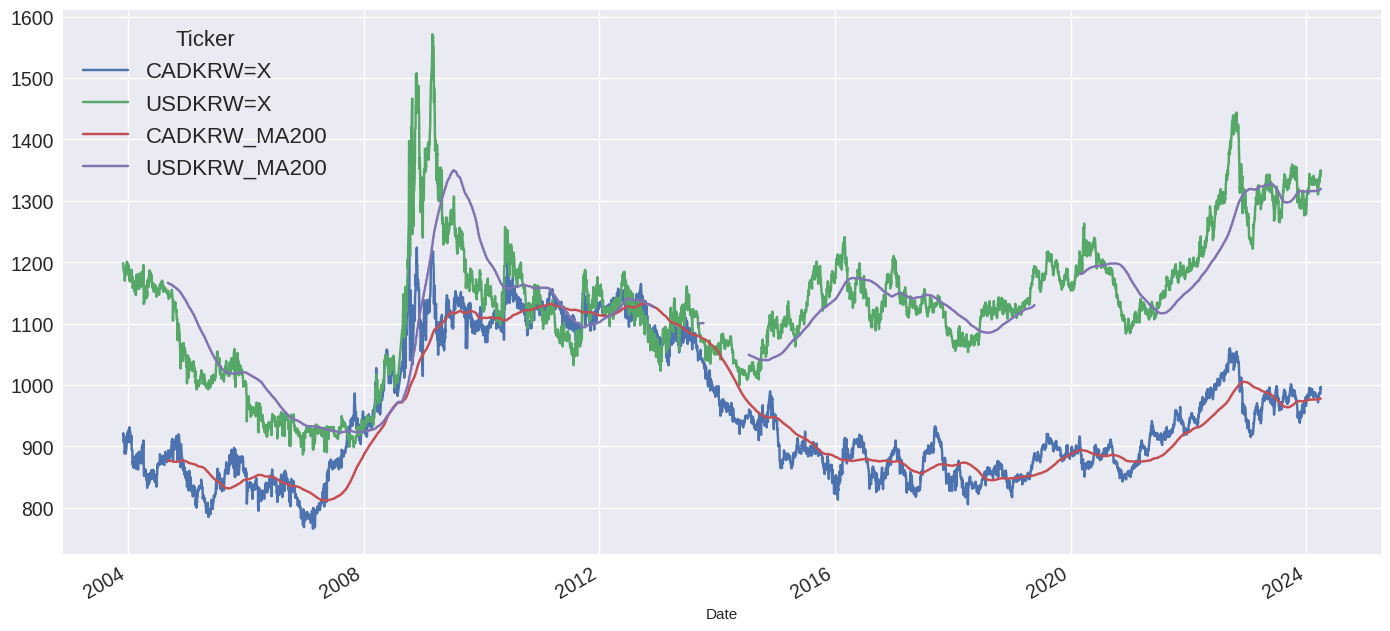

In [87]:
df["CADKRW_MA200"] = df["CADKRW=X"].rolling(200).mean()
df["USDKRW_MA200"] = df["USDKRW=X"].rolling(200).mean()
df.plot()

## Central Bank Rates vs Exchange Rates


In [88]:
# get fed rate using fredapi
from dotenv import load_dotenv
import os

load_dotenv()
fred_api = os.getenv('fred_key')

from fredapi import Fred
fred = Fred(api_key=fred_api)
fed_rate = fred.get_series('FEDFUNDS').to_frame('rate')
fed_rate['2003':]
fed_rate = fed_rate.resample('D').ffill()

In [89]:
boc_rate = fred.get_series('IRSTCB01CAM156N').to_frame('rate')
boc_rate = boc_rate['2003':]
boc_rate = boc_rate.resample('D').ffill()
boc_rate

,rate
2003-01-01,3.00
2003-01-02,3.00
2003-01-03,3.00
2003-01-04,3.00
2003-01-05,3.00
...,...
2023-11-27,5.25
2023-11-28,5.25
2023-11-29,5.25
2023-11-30,5.25


In [90]:
bok_rate = fred.get_series('IR3TCD01KRM156N').to_frame('rate')
bok_rate = bok_rate['2003':]
bok_rate = bok_rate.resample('D').ffill()

In [91]:
df["fed_rate"] = fed_rate
df["boc_rate"] = boc_rate
df["bok_rate"] = bok_rate
df = df.dropna()
df

Ticker,CADKRW=X,USDKRW=X,CADKRW_MA200,USDKRW_MA200,fed_rate,boc_rate,bok_rate
Date,,,,,,,
2004-09-03,884.929993,1151.199951,877.170949,1166.452504,1.61,2.50,3.52
2004-09-06,888.530029,1153.500000,877.019999,1166.228004,1.61,2.50,3.52
2004-09-07,893.619995,1151.300049,876.881049,1166.009504,1.61,2.50,3.52
2004-09-08,888.830017,1148.000000,876.740150,1165.787004,1.61,2.50,3.52
2004-09-09,885.659973,1140.300049,876.630899,1165.538004,1.61,2.50,3.52
...,...,...,...,...,...,...,...
2023-11-27,946.193909,1289.790039,973.669359,1315.933347,5.33,5.25,3.83
2023-11-28,957.197205,1302.530029,973.639420,1315.965447,5.33,5.25,3.83
2023-11-29,948.981018,1287.530029,973.560531,1315.873947,5.33,5.25,3.83


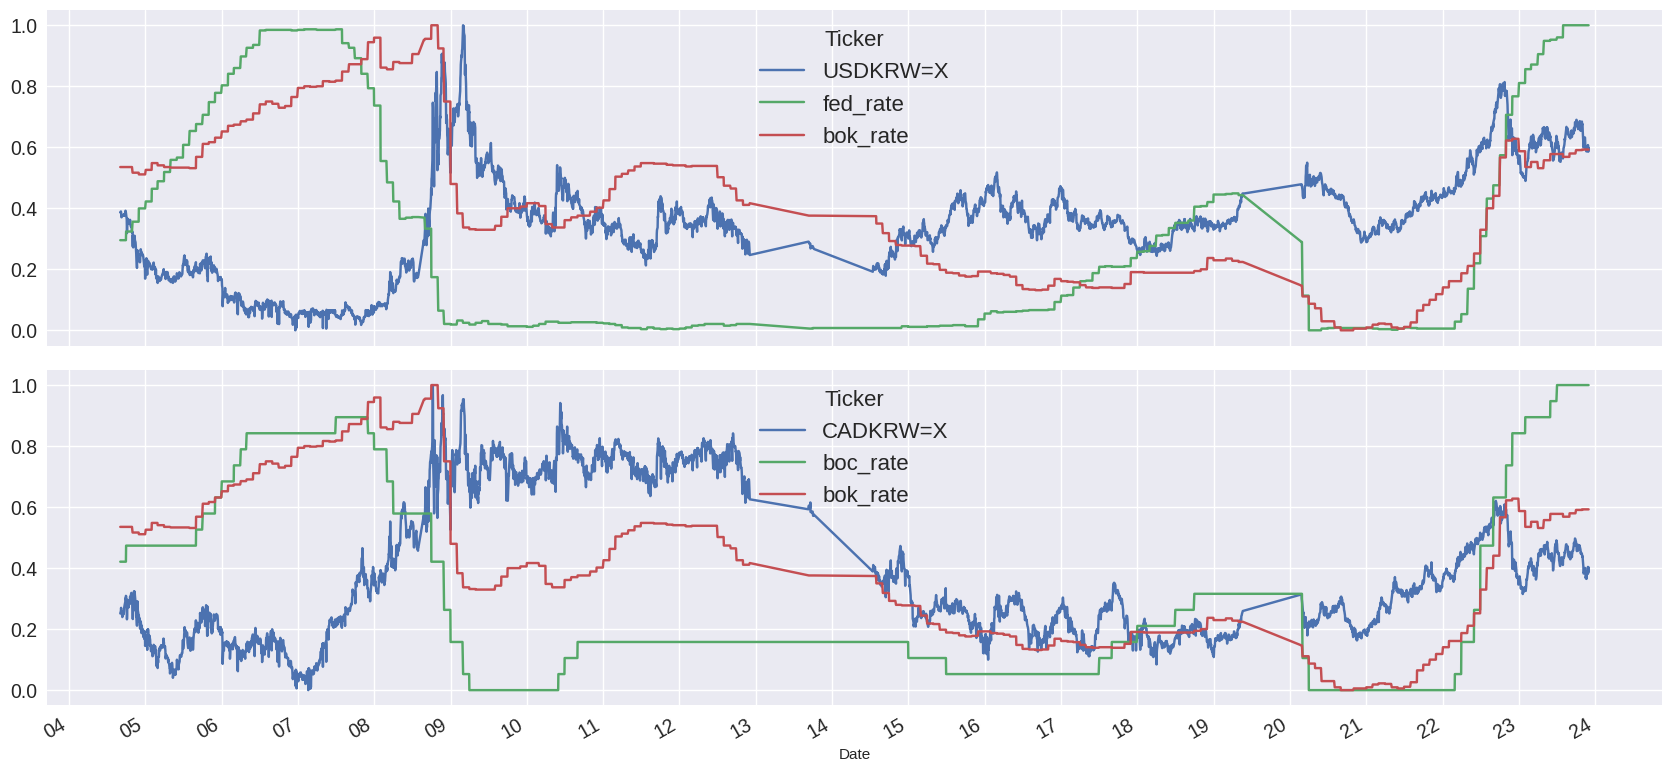

In [111]:
# Normalize the data
ndf = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

import matplotlib.dates as mdates

# fig - a box like object holding one or more axes
# axs - a list of axes objects.
fig, axs = plt.subplots(2, 1, figsize=(17, 8))

ndf[["USDKRW=X", "fed_rate", "bok_rate"]].plot(ax=axs[0])
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%y'))

ndf[['CADKRW=X', 'boc_rate', "bok_rate"]].plot(ax=axs[1])
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%y'))

# Rotate the x-axis labels
plt.gcf().autofmt_xdate()
# Adjust the margin between the subplots to avoid overlapping
plt.tight_layout()
plt.show()

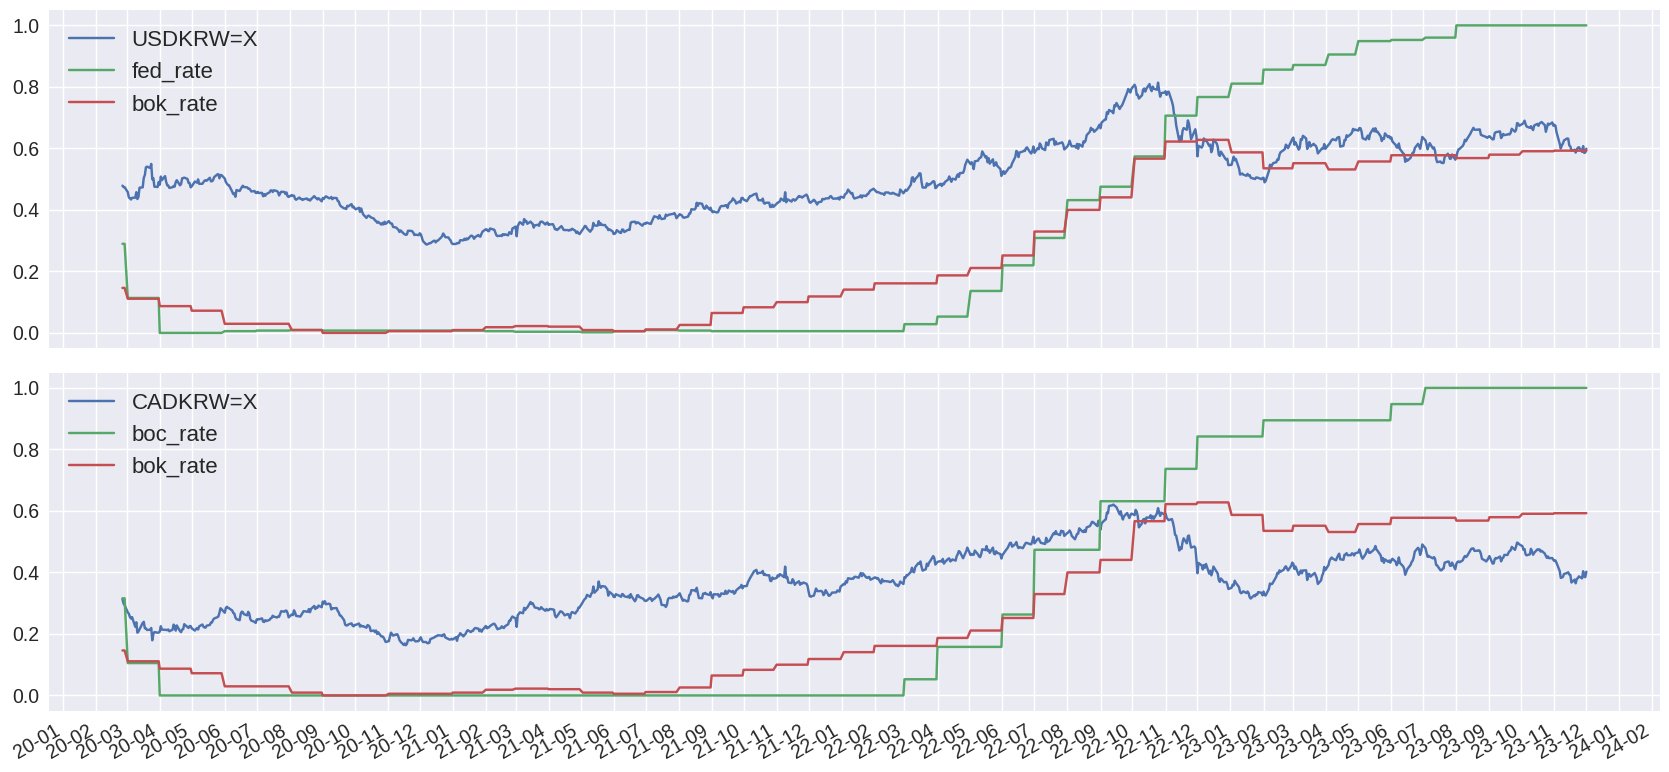

In [134]:
ndf_2020 = ndf['2020': ]

fig, axs = plt.subplots(2, 1, figsize=(17, 8))

 
# axs[0].xaxis.set_major_locator(mdates.MonthLocator())  # set x-ticks to every month
# axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))  # format x-ticks as 'YY-MM'
# axs[0].autoscale_view()

# This doesn't apply the above axis settings correctly because
# pandas' plot() calls autoscale_view() internally, which resets the axis settings.
# ndf_2020[["USDKRW=X", "fed_rate", "bok_rate"]].plot(ax=axs[0])

# axs[1].xaxis.set_major_locator(mdates.MonthLocator())  # set x-ticks to every month
# axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))  # format x-ticks as 'YY-MM'
# axs[1].autoscale_view()
# ndf_2020[['CADKRW=X', 'boc_rate', "bok_rate"]].plot(ax=axs[1])

def plot_data(ax, df, cols):
    for col in cols:
        ax.plot(df.index, df[col], label=col)
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # set x-ticks to every month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))  # format x-ticks as 'YY-MM'
    ax.legend()

plot_data(axs[0], ndf_2020, ["USDKRW=X", "fed_rate", "bok_rate"])
plot_data(axs[1], ndf_2020, ['CADKRW=X', 'boc_rate', "bok_rate"])

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()



## 하루 4.5% 튀어오른 원화값 (엔`위안화보다 훨씬 민감)
https://n.news.naver.com/article/009/0005043994

> 미국 달러당 원화값이 석 달 만에 1310원대로 올라섰다. 미국발(發) 물가 서프라이즈에 따라 미국 연방준비제도(Fed·연준)가 긴축 속도 조절에 나설 것이란 기대가 달러값 약세로 이어진 결과다. <br/> 여기에 한국 정부의 외환시장 대책, 중국 정부의 '제로 코로나' 방역 정책 완화 소식까지 더해지며 원화값이 장중 60원 넘게 폭등했다. 하루 변동폭 기준으로는 글로벌 금융위기 때인 2008년 11월 6일(64.8원) 이후 14년 만에 가장 크게 뛰었다. <br/> 11일 서울 외환시장에서 달러당 원화값은 전날보다 59.1원 오른 1318.4원에 마감했다. 이날 원화값은 전날보다 30원 급등한 1347.5원에 거래를 시작했다. 전날 발표된 미국의 10월 소비자물가지수(CPI)가 시장 전망치를 밑돌면서 물가 상승이 정점을 찍었다는 인식이 퍼졌기 때문이다.

> 김승혁 NH선물 연구원은 "강달러 모멘텀이 약해진 만큼 연말까지는 원화값 상승도 예상할 수 있다"며 "내년 연준의 피벗(방향 전환) 시그널이 없는 가운데 고용불안, 소비침체 등으로 미국 경제 성장성이 훼손될 경우 안전자산인 달러 선호 현상이 강해지면서 원화 약세 흐름이 다시 나타날 수 있다"고 말했다.

## 원-달러 환율 이틀 만에 35원 급락…미 연준 금리인상 종료 기대감
https://www.hani.co.kr/arti/economy/finance/1114872.html
수정 2023-11-04 00:28등록 2023-11-03 16:57

> 원-달러 환율이 하루 만에 20원 떨어졌다. 미국 연방준비제도(Fed)의 정책금리 인상 종료에 대한 기대감으로 달러화 강세가 다소 누그러진 탓이다. <br/> 3일 서울 외환시장에서 원-달러 환율은 전 거래일보다 20.50원 하락한 1322.40원에 거래를 마쳤다. 지난 3월23일(29.40원) 이후 가장 큰 하락 폭이다. 그만큼 원화 가치가 올라갔다는 뜻이다. 전날에도 원-달러 환율은 14.40원 내려간 바 있다. <br/> 미 연준의 정책금리 인상이 막바지에 달했다는 기대감으로 달러화 가치가 떨어졌다. 6개 주요 통화 대비 달러화 가치를 보여주는 ‘달러인덱스’는 이날 오전 기준 106.129로 전 거래일 대비 0.51% 하락했다.

## Market confidence -> Strong KRW
- Bull expection brought down the rate
- Downturn in Nov 2022 also caused by market's expectation for strong bull
  - Morgan Stanley's 

It's difficult to predict exchange rate. It's better to react accordingly.

<Axes: xlabel='Date'>

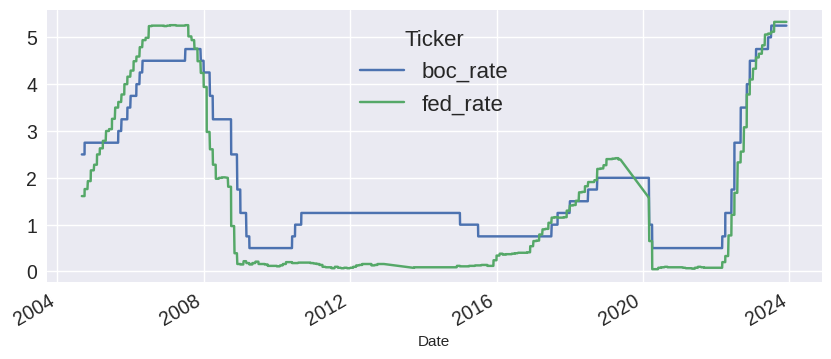

In [143]:
df[["boc_rate", "fed_rate"]].plot(figsize=(10, 4))

## Rate, oil on USD, CAD, and KRW
- Are fed rate and oil price leading or lagging indicator?
- How are they interact with three currencies?

In [139]:
oil = fred.get_series('DCOILBRENTEU').to_frame()
oil

,0
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2024-03-19,87.36
2024-03-20,85.77
2024-03-21,84.92
2024-03-22,84.87


In [146]:
df['oil'] = oil
df

/tmp/ipykernel_48493/592944249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oil'] = oil


Ticker,CADKRW=X,USDKRW=X,CADKRW_MA200,USDKRW_MA200,fed_rate,boc_rate,bok_rate,oil
Date,,,,,,,,
2004-09-03,884.929993,1151.199951,877.170949,1166.452504,1.61,2.50,3.52,41.07
2004-09-06,888.530029,1153.500000,877.019999,1166.228004,1.61,2.50,3.52,40.40
2004-09-07,893.619995,1151.300049,876.881049,1166.009504,1.61,2.50,3.52,40.19
2004-09-08,888.830017,1148.000000,876.740150,1165.787004,1.61,2.50,3.52,39.91
2004-09-09,885.659973,1140.300049,876.630899,1165.538004,1.61,2.50,3.52,41.45
...,...,...,...,...,...,...,...,...
2023-11-27,946.193909,1289.790039,973.669359,1315.933347,5.33,5.25,3.83,79.49
2023-11-28,957.197205,1302.530029,973.639420,1315.965447,5.33,5.25,3.83,81.66
2023-11-29,948.981018,1287.530029,973.560531,1315.873947,5.33,5.25,3.83,82.98


<Axes: xlabel='Date'>

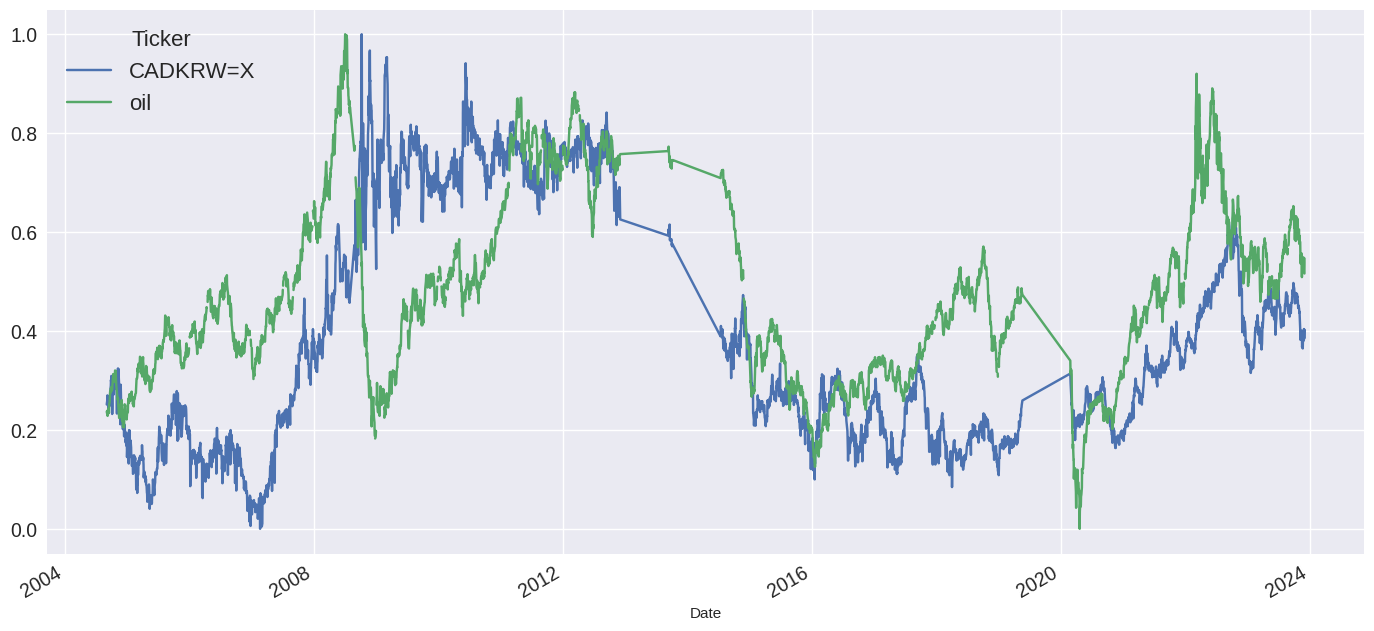

In [152]:
# Normalize the data
ndf = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
ndf[["CADKRW=X", 'oil']].plot()

# Oil and CADKRW usually move together

CAD-KRW has a strong correlation with oil price and inverse correlation with fed rates.
For USD-KRW, the fed rate has a strong, but little bit weaker correlation compared to CAD-KRW, and a weak correlation with the oil price.

In [320]:
normalized.corr()

,fed_rate,oil_price,usd_krw,usd_cad,cad_krw,adjusted_oil
fed_rate,1.000000,-0.631500,-0.622711,0.231451,-0.751132,-0.631500
oil_price,-0.631500,1.000000,0.306897,-0.702188,0.772056,1.000000
usd_krw,-0.622711,0.306897,1.000000,0.256898,0.759203,0.306897
usd_cad,0.231451,-0.702188,0.256898,1.000000,-0.425928,-0.702188
cad_krw,-0.751132,0.772056,0.759203,-0.425928,1.000000,0.772056
adjusted_oil,-0.631500,1.000000,0.306897,-0.702188,0.772056,1.000000


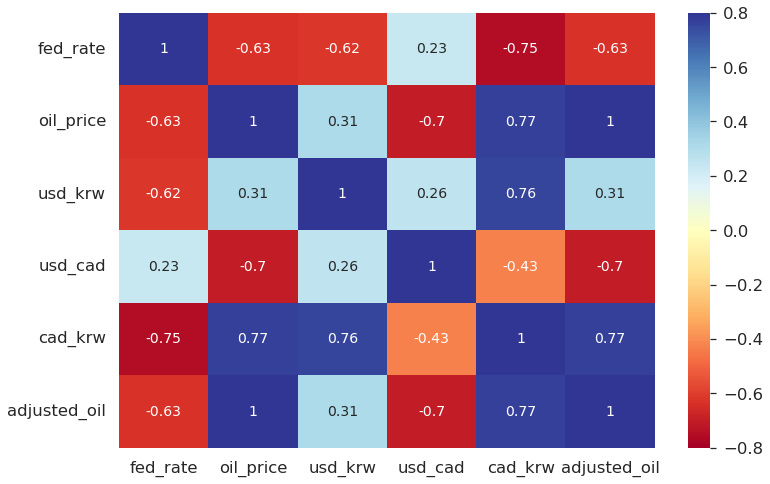

In [321]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.heatmap(
    normalized.corr(),cmap="RdYlBu", annot=True,
    annot_kws={"size":14}, vmax=0.8, vmin=-0.8
    )
plt.show()

- The biggest spike around 1998 is coming from IMF crisis in SK, and seems to be detached from the rate.
- Global financial crisis in 2008 seems to be causing a big surge.
- Fed rate seems to affect more closely after 2008.

<AxesSubplot:xlabel='date'>

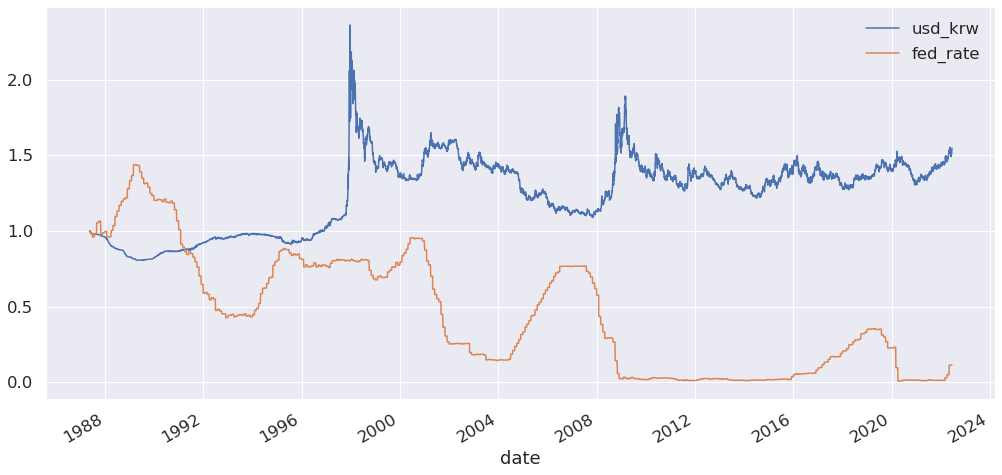

In [322]:
normalized[["usd_krw", "fed_rate"]].plot()

Fed rate is almost acting as a leading indicator to USD-KRW after around 2017, but why did it not before? 
All the fluctuation before 2018 doesn't seem to care about the rate.

<AxesSubplot:xlabel='date'>

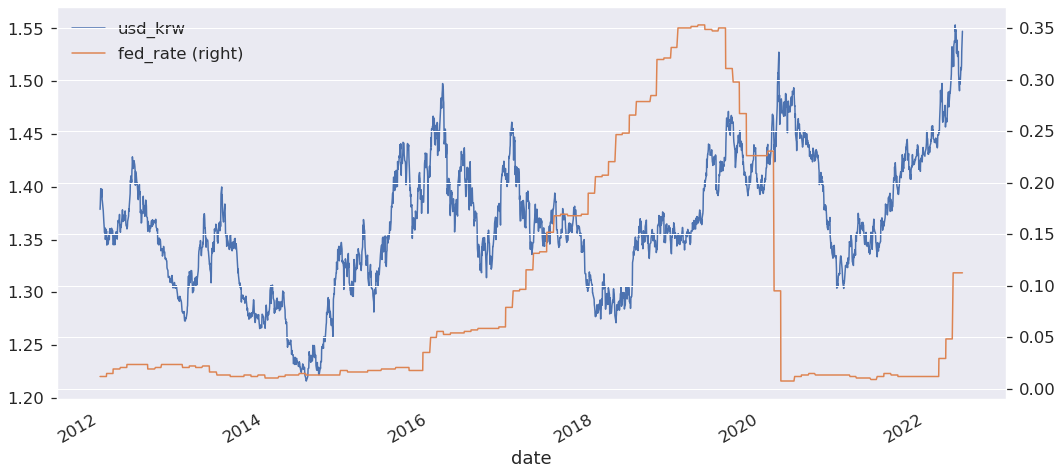

In [323]:
normalized[["usd_krw", "fed_rate"]].loc["2012":].plot(
    secondary_y="fed_rate"
)

<AxesSubplot:xlabel='date'>

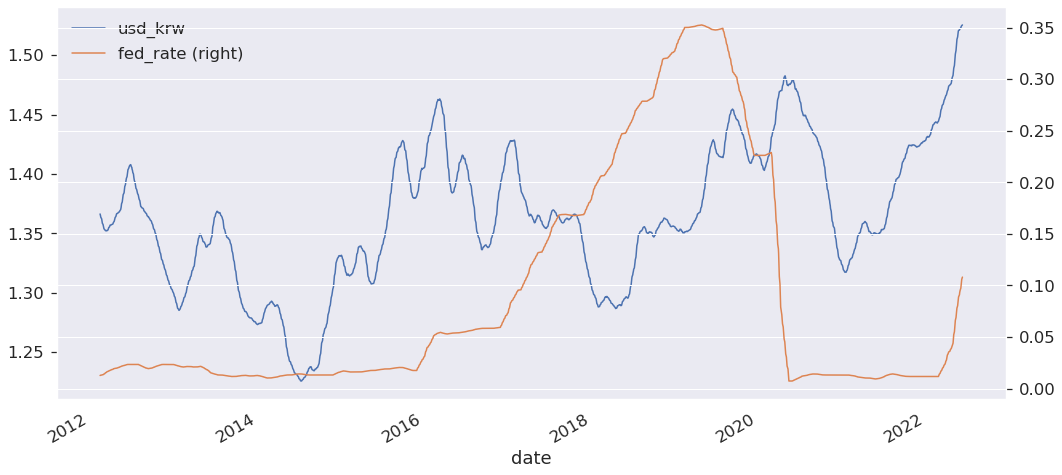

In [324]:
normalized[["usd_krw", "fed_rate"]].loc["2012":].rolling(30).mean().plot(
    secondary_y="fed_rate"
)

<AxesSubplot:xlabel='date'>

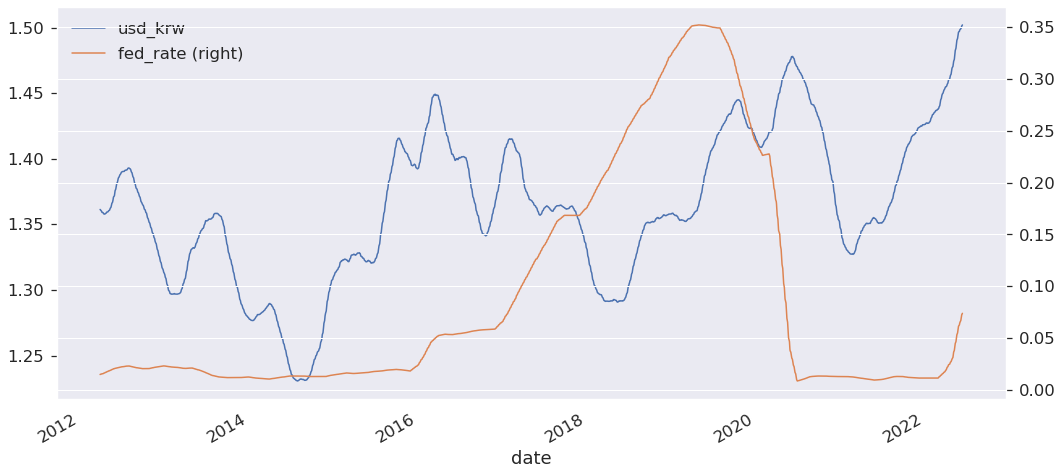

In [325]:
normalized[["usd_krw", "fed_rate"]].loc["2012":].rolling(60).mean().plot(
    secondary_y="fed_rate"
)

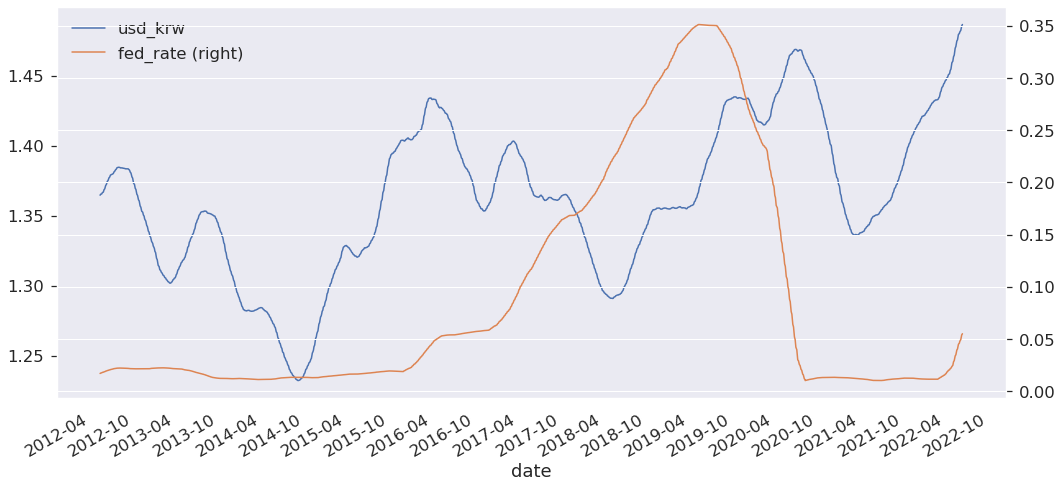

In [326]:
import matplotlib.dates as mdates

ax = normalized[["usd_krw", "fed_rate"]].loc["2012":].rolling(90).mean().plot(
    secondary_y="fed_rate",
    x_compat=True
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.show()


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='date'>

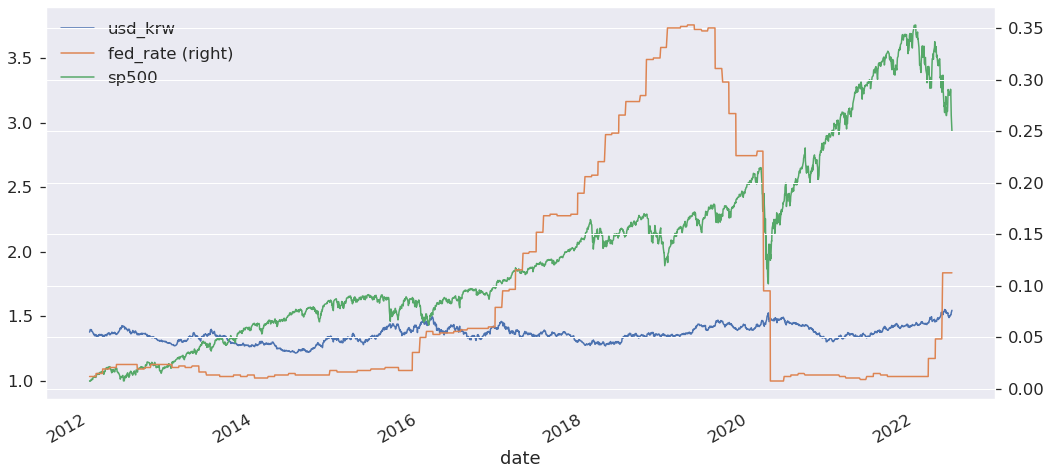

In [327]:
import yfinance as yf

sp500 = yf.download('^GSPC', start="2012-01-01")["Close"].to_frame("sp500")
sp500 /= sp500.iloc[0]
sp500
normalized["sp500"] = sp500

normalized[["usd_krw", "fed_rate", "sp500"]].loc["2012":].plot(
    secondary_y="fed_rate"
)

Fed rate was already on downhill before the beginning of the pandemic. Why?

[2019: The year the Federal Reserve admitted it was wrong
]('./year-federal-reserve-admitted-it-was-wrong.md')

> “The data is just screaming at them: We can sustain this low unemployment rate for a considerable amount of time without creating inflationary pressures,”

> The Fed spent most of last year concerned that Trump’s tax cuts would spur a hot economy and rising inflation. Fed leaders anticipated they would need to raise interest rates twice in 2019 to tap the brakes on the economy. None of that came to pass.

> By Jan. 4, Powell had a different message, effectively admitting the December 2018 rate hike was a miscalculation.

> In July, the Fed made its first rate cut in more than a decade, as it became more likely that the economy needed stimulus, not restraint.

> “Part of the reason the Fed had to cut this year was because the trade wars were taking a bigger bite out of growth,”

> Fears of a recession have faded, largely because of the Fed’s three interest rate cuts in the latter half of the year which helped to counterbalance the harm from Trump’s trade war. Even the bond market, which briefly flashed a warning sign in August when the [yield curve inverted](https://www.washingtonpost.com/business/2019/08/14/recession-watch-what-is-an-inverted-yield-curve-why-does-it-matter/?itid=lk_inline_manual_43), is now back to its normal.

- Unemployment rate & inflation is what the fed is looking at 
- Fed tries to take pre-active action to keep the inflation and employment at the healthy level
- Bond market, as someone on the youtube mentioned, is supposed to be a leading indicator of market mood.

TODO: get unemployment, inflation, bond market data

# FRED API
FRED offers free access to their API.


In [328]:
# Use dotenv and os to load up api key from .env file
from dotenv import load_dotenv
import os

load_dotenv()

fred_api = os.getenv('fred_key')
fred_api[-4:]

'ef7d'

In [329]:
from fredapi import Fred

fred = Fred(api_key=fred_api)
fred.get_series('SP500')

2012-07-06    1354.68
2012-07-09    1352.46
2012-07-10    1341.47
2012-07-11    1341.45
2012-07-12    1334.76
               ...   
2022-06-29    3818.83
2022-06-30    3785.38
2022-07-01    3825.33
2022-07-04        NaN
2022-07-05    3831.39
Length: 2608, dtype: float64

In [330]:
fred.get_series('UNRATE')

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-01-01    4.0
2022-02-01    3.8
2022-03-01    3.6
2022-04-01    3.6
2022-05-01    3.6
Length: 893, dtype: float64

In [331]:
#  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
cpi = fred.get_series('CPIAUCSL')

<AxesSubplot:>

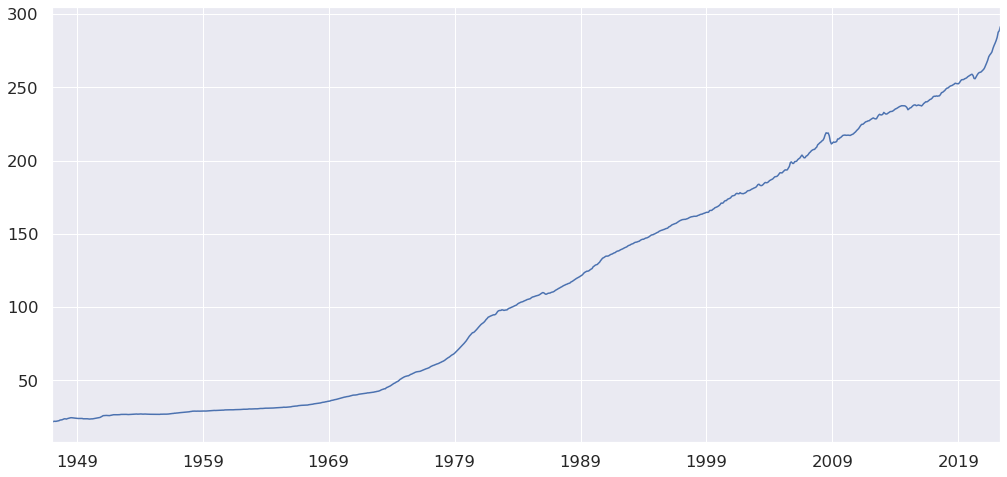

In [332]:
cpi.plot()

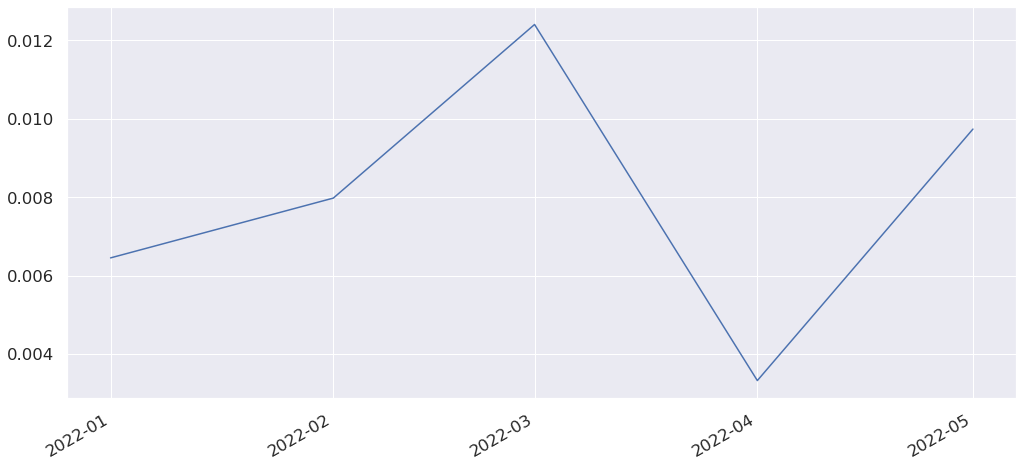

In [340]:
ax = cpi.pct_change()["2022":].plot(x_compat = True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()